In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


In [6]:
kmeans = KMeans(n_clusters=10, random_state=8)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[1 1 1 9 7 0 7 4 0 0 3 3 7 4 0 4 3 3 8 0 0 6 4 8 1 7 4 7 3 3 7 4 3 1 3 3 4
 9 0 0 0 9 7 4 0 7 6 0 9 0 9 0 9 3 4 9 1 4 0 6 6 6 4 6 4 4 6 9 6 9 1 6 7 4
 0 3 0 7 7 0 9 0 2 7 9 7 4 7 9 4 4 4 4 0 4 1 9 6 9 4 4 6 9 6 6 4 9 9 8 9 6
 9 0 6 6 9 6 3 3 3 9 7 8 0 0 0 4 7 4 7 9 3 3 4 7 0 9 9 4 9 6 3 9 0 9 9 9 4
 4 0 0 6 6 9 0 9 3 3 9 9 9 7 8 9 8 4 6 3 7 4 9 4 3 6 6 6 6 4 0 9 2 8 3 9 4
 6 7 9 9 9 0 0 6 0 4 0 4 3 7 4 0 3 8 3 0 4 6 3 0 4 1 9 2 3 4 0 9 6 1 8 0 0
 6 3 0 4 6 4 0 0 3 9 9 1 6 0 2 1 4 3 0 9 9 0 7 6 0 0 9 9 1 9 1 3 1 4 1 4 3
 4 1 3 3 4 7 2 6 0 0 6 0 9 8 6 3 9 9 3 0 0 1 9 7 3 0 9 9 0 9 9 4 4 0 9 9 0
 6 9 4 6 1 9 1 6 9 9 0 6 0 0 9 4 0 9 6 9 9 7 6 9 6 1 0 1 9 9 0 9 3 4 3 0 9
 9 9 3 0 1 6 2 4 6 9 7 9 6 9 4 9 9 9 4 2 4 9 9 0 0 6 6 9 0 9 3 0 1 1 0 2 8
 3 4 7 1 0 4 6 0 0 9 9 9 9 9 0 4 9 0 9 7 6 6 3 8 9 0 0 0 9 9 3 9 0 0 9 9 4
 0 3 0 9 9 6 4 4 9 6 7 9 9 9 4 9 0 6 6 6 9 9 0 4 9 7 7 4 4 0 0 0 0 9 3 0 6
 3 9 7 4 4 1 9 7 9 4 0 0 9 0 0 6 7 5 0 9 0 0 0 6 7 9 6 9 4 9 9 0 4 0 9 4 9
 4 0 0 4 9 4 1 9 3 0 3 7 

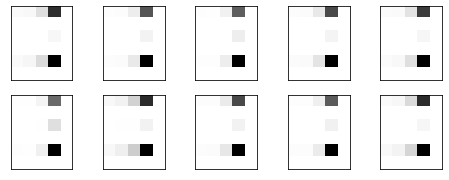

In [7]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [8]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.8892794376098418

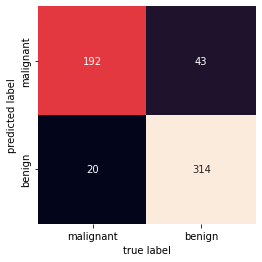

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');